# Cis-eQTL Cis-pQTL Colocalization

**Created**: 23 March 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)
library(coloc)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


This is coloc version 5.1.1



## Load Summary Information

In [2]:
eqtl.pqtl.meta <- read.table("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/eQTL_pQTL_metadata.tsv", sep="\t", header=TRUE)

In [3]:
head(eqtl.pqtl.meta)

,Protein,Accession,Entry.Name,Gene.Names,Protein.Length,Coverage,Protein.Existence,Description,UniProt_ID,Gene_ID,⋯,feature,start,end,score,strand,frame,gene_id,gene_name,gene_biotype,tss
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,sp|A0A075B6I9|LV746_HUMAN,A0A075B6I9,LV746_HUMAN,IGLV7-46,117,76.9,3:Protein inferred from homology,Immunoglobulin lambda variable 7-46,A0A075B6I9,ENSG00000211649,⋯,gene,22369614,22370087,.,+,.,ENSG00000211649,IGLV7-46,IG_V_gene,22369614
2,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000244116,⋯,gene,89221698,89222461,.,-,.,ENSG00000244116,IGKV2-28,IG_V_gene,89222461
3,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000282025,⋯,,NA,NA,,,,,,,NA
4,sp|A0A087WSY6|KVD15_HUMAN,A0A087WSY6,KVD15_HUMAN,IGKV3D-15,115,96.5,3:Protein inferred from homology,Immunoglobulin kappa variable 3D-15,A0A087WSY6,ENSG00000224041,⋯,gene,90114838,90115402,.,+,.,ENSG00000224041,IGKV3D-15,IG_V_gene,90114838
5,sp|A0A087WW87|KV240_HUMAN,A0A087WW87,KV240_HUMAN,IGKV2-40,121,81.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-40,A0A087WW87,ENSG00000273962,⋯,gene,89330110,89330429,.,-,.,ENSG00000273962,IGKV2-40,IG_V_gene,89330429
6,sp|A0A0B4J1V0|HV315_HUMAN,A0A0B4J1V0,HV315_HUMAN,IGHV3-15,119,84.0,3:Protein inferred from homology,Immunoglobulin heavy variable 3-15,A0A0B4J1V0,ENSG00000282290,⋯,,NA,NA,,,,,,,NA


Load summary statistics from conditional analysis performed using COJO.

In [4]:
cis.pqtl.summary <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_all.RDS")

In [5]:
head(cis.pqtl.summary)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs79059311,8,21133434,-0.03131867,0.05348602,-0.5855487,0.5584249,O43593,ENSG00000168453
2,rs34883006,8,21133873,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453
3,rs35853955,8,21135276,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453
4,rs78546479,8,21135388,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453
5,rs13261360,8,21137022,-0.04384358,0.05411982,-0.8101205,0.4181245,O43593,ENSG00000168453
6,rs1563919,8,21139106,0.01378641,0.02750455,0.5012410,0.6162944,O43593,ENSG00000168453


In [6]:
cis.eqtl.summary <- do.call(rbind, lapply(1:22, function(chr) {
    fread(paste0("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LD/chr", chr, "_conditional_cis_eQTL_summary_statistics.tsv")) %>%
        as.data.frame() %>%
        dplyr::filter(Gene %in% cis.pqtl.summary$Gene)
}))

In [7]:
head(cis.eqtl.summary)

,Gene,Signal,Chr,SNP,Position,Beta,SE,P_Value
,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000000971,1,1,rs1009188,197287960,-0.0431792804,0.03260455,0.1858082
2,ENSG00000000971,1,1,rs1011673,195944301,0.0422601284,0.02917841,0.1479048
3,ENSG00000000971,1,1,rs10157380,196218579,0.0498352954,0.03949230,0.2075017
4,ENSG00000000971,1,1,rs10157465,197343812,0.0003986006,0.04737622,0.9932875
5,ENSG00000000971,1,1,rs10158703,196218838,0.0498352954,0.03949230,0.2075017
6,ENSG00000000971,1,1,rs10218789,195740069,-0.0233229062,0.02819979,0.4084017


In [8]:
# Example with HIF1A
hif1a = "ENSG00000100644"

hif1a.summary <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LD/chr14_conditional_cis_eQTL_summary_statistics.tsv") %>%
    as.data.frame() %>%
    dplyr::filter(Gene == hif1a)

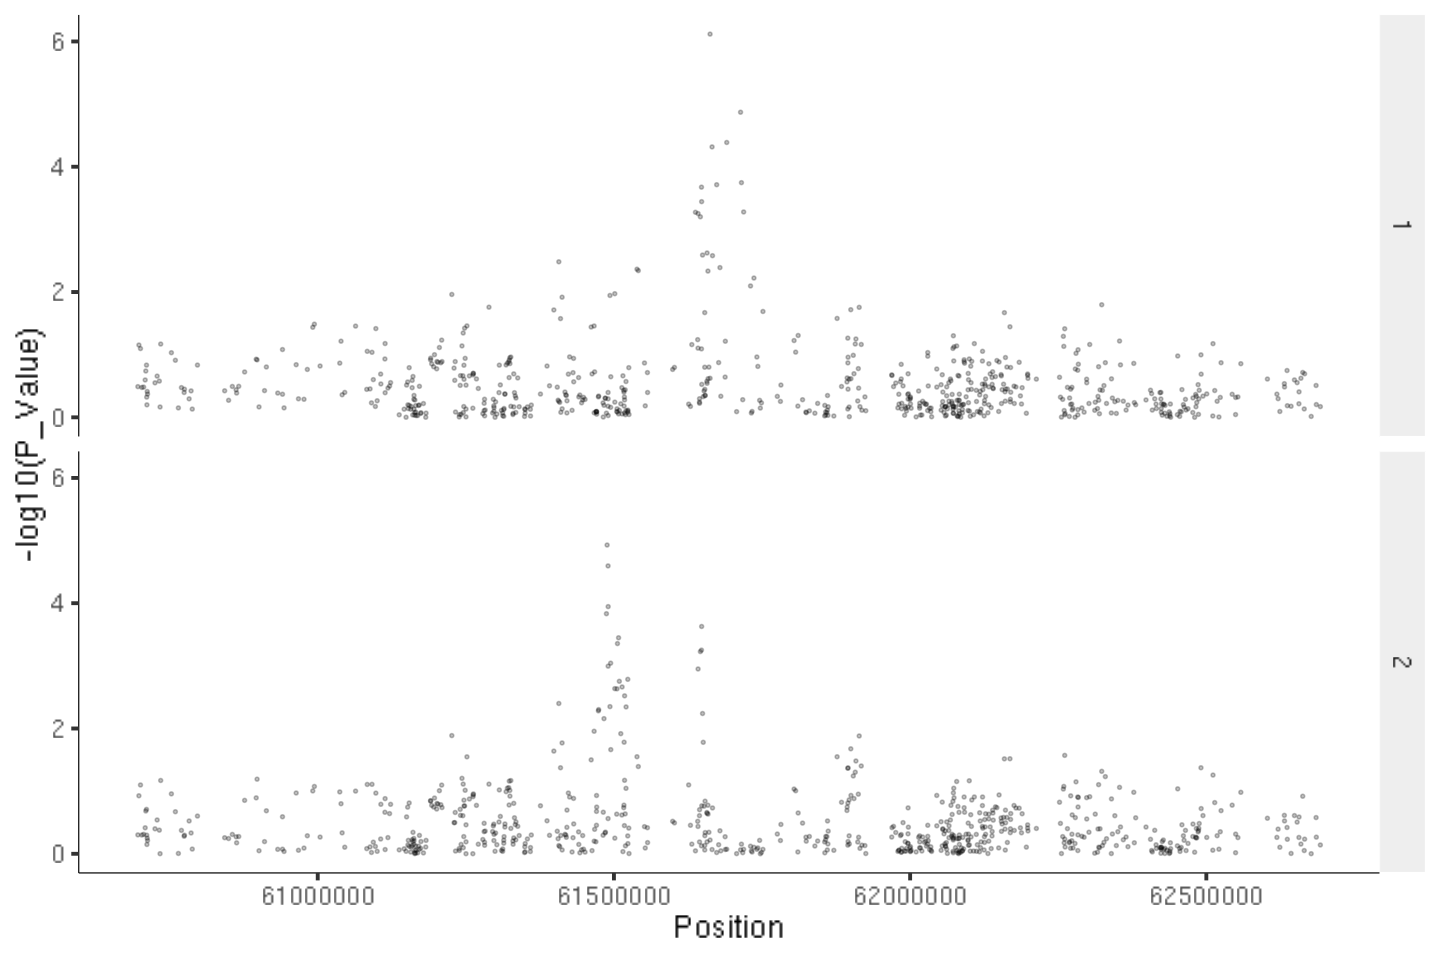

In [9]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(hif1a.summary) +
    geom_point(aes(x=Position, y=-log10(P_Value)), alpha=0.25, size=0.5) +
    facet_grid(Signal ~ .) +
    ggplot_theme

Split summary statistics by locus.

In [10]:
cis.eqtl.loci <- split(cis.eqtl.summary, cis.eqtl.summary$Gene)
cis.pqtl.loci <- split(cis.pqtl.summary, cis.pqtl.summary$Gene)

## Load Gene and Protein Expression

In [11]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")
gene.exp <- t(gene.exp)
rownames(gene.exp) <- gsub("^GA", "", rownames(gene.exp))

In [12]:
head(gene.exp)

,ENSG00000230521,ENSG00000225864,ENSG00000227766,ENSG00000237669,ENSG00000271581,ENSG00000285647,ENSG00000204435,ENSG00000231074,ENSG00000227262,ENSG00000206337,⋯,ENSG00000288253,ENSG00000288302,ENSG00000288349,ENSG00000288393,ENSG00000288398,ENSG00000288538,ENSG00000288559,ENSG00000288562,ENSG00000288573,ENSG00000288582
UK02270173_3,0.6644339,0.9817872,1.2117156,0.6420763,2.474490,0.00000000,3.704888,4.027339,0.06866465,7.318038,⋯,0.5247755,1.3000450,0.5247755,0.92735960,1.133738,1.1337380,0.9457312,0.87079780,0.31467050,2.811486
UK15130120_3,0.5827160,0.4387994,0.3068267,0.6925683,1.331531,0.03379072,4.261280,3.634898,0.25046090,6.369198,⋯,0.5125515,1.7424980,0.4883840,0.06680807,1.860177,0.6496258,0.9264084,0.06680807,0.22143010,3.343063
UK58000006_3,0.4046756,0.6022344,0.6625010,0.9792012,1.831046,0.00000000,3.719682,3.597655,0.00000000,6.837021,⋯,0.2947282,1.5250610,0.6326824,0.66250100,1.315821,1.4755270,1.0258310,0.29472820,0.13374420,4.010874
UK47010004_3,0.2090516,0.9234049,0.7996329,0.6992958,2.475317,0.05517067,4.169617,3.016982,0.30321616,7.723203,⋯,0.3032162,0.9527571,1.0911770,0.30321620,1.143029,1.8370600,0.7669565,0.25690200,0.10830900,2.610379
UK42020088_5,0.2211571,0.2211571,0.6445686,0.3765156,1.881204,0.67482702,4.527758,3.624300,0.04702687,6.350747,⋯,0.0925691,1.2174450,0.6748270,0.13671760,1.088510,2.0637890,0.8172741,0.04702687,0.22115710,2.434768
UK47490007_3,0.4288519,1.1450686,0.3130290,1.0756817,2.053137,0.00000000,4.581986,3.101136,0.00000000,6.728267,⋯,0.5012039,1.9916780,1.1895390,0.35267880,1.211271,0.7590055,0.6033524,1.02749800,0.09657541,3.816079


In [13]:
pqtl.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/Genotyping/All_genotyping_merged_filtered_b38_refiltered_rsID.fam", drop=3:6)
colnames(pqtl.geno) <- c("family", "individual")
protein.exp <- read.csv("/lustre/scratch119/humgen/projects/gains_team282/proteomics/MS2019_processed_data/data_291x1860_MS2019.csv", row.names=1)
protein.exp <- t(protein.exp)
rownames(protein.exp) <- gsub("^X", "", gsub("\\..*$", "", rownames(protein.exp)))
protein.info <- read.csv("/lustre/scratch119/humgen/projects/gains_team282/proteomics/MS2019_processed_data/sample_info_1860_MS2019.csv", row.names=1)
protein.info <- protein.info %>%
    dplyr::filter(Patient %in% pqtl.geno$individual)
protein.info$Patient <- gsub("^GA", "", protein.info$Patient)
protein.exp <- protein.exp[paste0(protein.info$Injection),]

In [14]:
head(protein.exp)

,A0A075B6I9,A0A075B6P5,A0A087WW87,A0A0B4J1V0,A0A0B4J1V2,A0A0B4J1V6,A0A0C4DH31,A0A0C4DH38,A0A0C4DH72,A2VEC9,⋯,A6NJ88,A1L157,P51159,Q16651,Q8N2U0,Q92527,Q969V1,Q96BR1,Q86VK4,P11309
3439,14.06345,16.03609,15.50883,17.24218,15.51442,12.31986,13.16036,10.45236,12.21718,13.56052,⋯,16.83735,16.45940,13.20547,14.32942,13.36351,14.42539,15.60032,11.94983,14.23356,12.40308
3440,14.25070,13.03507,11.92701,17.42626,17.30772,12.15789,14.40737,13.44694,11.94252,13.98888,⋯,13.48823,15.69690,13.67583,14.95902,13.37234,14.83777,15.51079,11.73576,14.14074,12.39263
3441,15.02175,16.21867,11.63172,16.83393,15.82620,12.19347,14.19060,13.89406,11.88166,14.30399,⋯,15.89227,13.91093,13.71481,13.77387,13.49517,14.86029,15.37486,11.84970,14.94318,12.00046
3442,14.51218,12.77215,12.62772,16.83453,16.02655,11.92471,14.63931,13.94733,11.86421,14.11091,⋯,14.23426,15.79861,13.70199,14.74071,14.88895,14.60881,15.40724,12.30258,15.02014,11.31928
3443,15.26602,12.62202,11.30896,16.82177,16.24261,12.21507,14.17042,12.75975,11.90041,14.28217,⋯,14.45529,15.21440,13.33776,14.71806,14.73925,14.69318,15.41036,11.92065,15.00276,10.80000
3444,14.64062,16.35344,11.26297,17.31887,15.64070,12.84245,14.26904,13.95091,12.90014,14.13249,⋯,13.18055,14.29860,13.58296,13.89738,14.48849,14.37257,15.56780,11.80031,14.95080,11.28800


## COLOC

In [15]:
coloc.res <- do.call(rbind, lapply(names(cis.eqtl.loci), function(gene) {
    
    cis.eqtl.signals <- split(cis.eqtl.loci[[gene]], cis.eqtl.loci[[gene]]$Signal)

    signal.res = do.call(rbind, lapply(names(cis.eqtl.signals), function(eqtl.signal) {

        cis.eqtl.signals[[eqtl.signal]] <- cis.eqtl.signals[[eqtl.signal]] %>%
            dplyr::filter(!is.na(Beta))

        cis.eqtl.locus <- list()
        cis.eqtl.locus$beta <- cis.eqtl.signals[[eqtl.signal]]$Beta
        cis.eqtl.locus$varbeta <- cis.eqtl.signals[[eqtl.signal]]$SE^2
        cis.eqtl.locus$snp <- cis.eqtl.signals[[eqtl.signal]]$SNP
        cis.eqtl.locus$position <- cis.eqtl.signals[[eqtl.signal]]$Position
        cis.eqtl.locus$type <- "quant"
        cis.eqtl.locus$sdY <- sd(gene.exp[,gene], na.rm=TRUE)

        cis.pqtl.locus <- list()
        cis.pqtl.locus$beta <- cis.pqtl.loci[[gene]]$pQTL_beta
        cis.pqtl.locus$varbeta <- cis.pqtl.loci[[gene]]$pQTL_SE^2
        cis.pqtl.locus$snp <- cis.pqtl.loci[[gene]]$SNP
        cis.pqtl.locus$position <- cis.pqtl.loci[[gene]]$Position
        cis.pqtl.locus$type <- "quant"
        cis.pqtl.locus$sdY <- sd(protein.exp[,eqtl.pqtl.meta$UniProt_ID[eqtl.pqtl.meta$Gene_ID == gene]], na.rm=TRUE)

        abf.res = suppressWarnings(coloc.abf(cis.eqtl.locus, cis.pqtl.locus))

        abf.res.df = data.frame(t(abf.res$summary))
        abf.res.df$Gene = gene
        abf.res.df$eQTL.Signal = eqtl.signal

        return(abf.res.df)
    }))
}))

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.92e-70  2.33e-69  2.37e-02  2.86e-01  6.90e-01 
[1] "PP abf for shared variant: 69%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.62e-13  8.67e-01  3.23e-14  1.07e-01  2.55e-02 
[1] "PP abf for shared variant: 2.55%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2380    0.6290    0.0296    0.0785    0.0248 
[1] "PP abf for shared variant: 2.48%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-21  1.21e-01  8.74e-21  8.73e-01  5.71e-03 
[1] "PP abf for shared variant: 0.571%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0702    0.0491    0.5060    0.3540    0.0215 
[1] "PP abf for shared variant: 2.15%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.25e-11  8.06e-01  1.13e-11  1.73e-01  2.08e-02 
[1] "PP abf for shared variant: 2.08%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.90500   0.02360   0.06570   0.00171   0.00357 
[1] "PP abf for shared variant: 0.357%"
PP.H0.abf PP.

## Colocalizing Loci

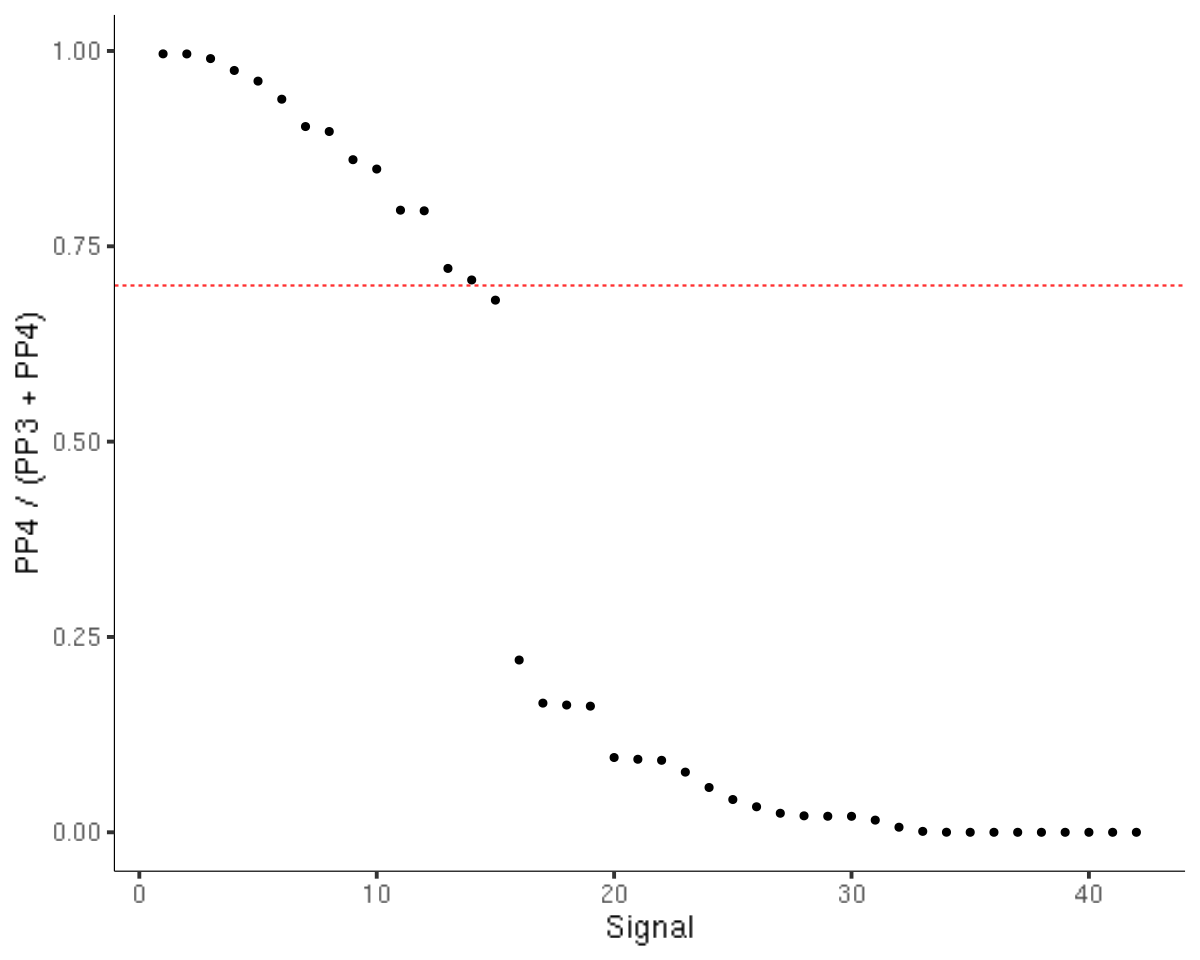

In [17]:
options(repr.plot.width=10, repr.plot.height=8)

coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::mutate(Rank=rank(-Coloc.Factor, ties.method="first")) %>%
    ggplot() +
    geom_point(aes(x=Rank, y=Coloc.Factor)) +
    geom_hline(aes(yintercept=0.7), lty=2, color="firebrick1") +
    xlab("Signal") + ylab("PP4 / (PP3 + PP4)") +
    ggplot_theme

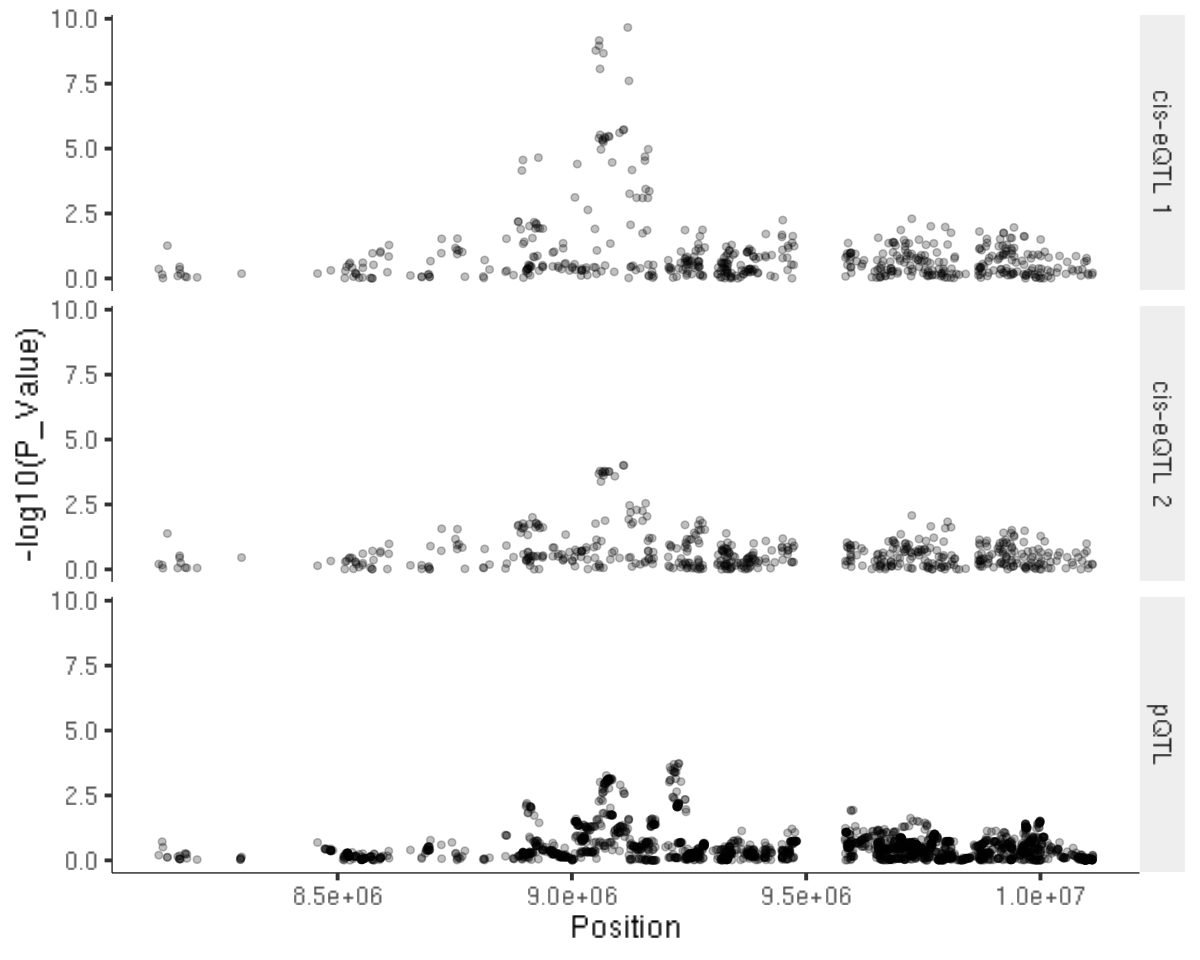

In [24]:
gene = "ENSG00000175899"

cis.eqtl.summary %>%
    dplyr::filter(Gene == gene) %>%
    dplyr::mutate(Signal = paste("cis-eQTL", Signal)) %>%
    dplyr::select(Position, P_Value, Signal) %>%
    dplyr::bind_rows(
        cis.pqtl.summary %>%
            dplyr::filter(Gene == gene) %>%
            dplyr::mutate(Signal = "pQTL") %>%
            dplyr::select(Position, P_Value=pQTL_pval, Signal)
    ) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(P_Value)), alpha=0.25) +
    facet_grid(Signal ~ .) +
    ggplot_theme

In [19]:
colocalizing <- coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::filter(Coloc.Factor > 0.7) %>%
    dplyr::arrange(desc(Coloc.Factor))

In [20]:
nrow(colocalizing)

[1] 14

In [23]:
colocalizing

nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,Gene,eQTL.Signal,Coloc.Factor
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
493,4.911490e-09,7.913659e-02,2.687305e-10,0.003412481,0.9174509,ENSG00000164692,1,0.9962943
451,1.988077e-02,9.031255e-02,9.397570e-04,0.003383558,0.8854834,ENSG00000139178,2,0.9961934
1179,5.883175e-23,5.719145e-23,1.094464e-02,0.009660092,0.9793953,ENSG00000211640,1,0.9902330
768,7.274230e-02,1.372772e-02,1.103695e-01,0.020045503,0.7831150,ENSG00000211896,1,0.9750417
566,5.184983e-01,1.519423e-01,3.918813e-02,0.011204643,0.2791666,ENSG00000175899,2,0.9614127
1357,5.883629e-10,3.163792e-03,1.161868e-08,0.061541589,0.9352946,ENSG00000176919,1,0.9382631
451,1.318074e-07,7.216159e-01,4.964363e-09,0.026927314,0.2514566,ENSG00000139178,1,0.9032728
4558,2.867535e-36,1.140768e-01,2.315521e-36,0.091321848,0.7946014,ENSG00000198734,1,0.8969190
2407,0.000000e+00,1.612820e-01,0.000000e+00,0.116713696,0.7220043,ENSG00000123838,1,0.8608427
